In [3]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd "gdrive/My Drive/Colab Notebooks/DSC DL Class/"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/DSC DL Class


In [4]:
# Step 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Step 2
df = pd.read_csv('/content/gdrive/My Drive/Deep Learning/Datasets/DATA/kc_house_data.csv')

In [7]:
# Step 3
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Step 13
df.drop('id',1,inplace=True)

In [9]:
# Step 14
df['date'] = pd.to_datetime(df['date'])

In [10]:
# Step 15
df['month'] = df['date'].dt.month   # no dt
df['year'] = df['date'].dt.year

In [11]:
# Step 16
df.drop('date', 1, inplace=True)

In [12]:
# Step 17
df.drop('zipcode', 1, inplace=True)

In [13]:
# Step 18
X = df.drop('price', 1).values
y = df['price'].values

In [14]:
# Step 19
from sklearn.model_selection import train_test_split

In [15]:
# Step 20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

In [16]:
# Step 21
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Step 22
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss',
                     patience=25)

In [18]:
# Step 23
model =  Sequential([Dense(19, activation='relu'),
                     Dense(19, activation='relu'),
                     Dense(19, activation='relu'),
                     Dense(19, activation='relu'),
                     Dense(1)])
model.compile(optimizer='adam', loss='mse')

In [19]:
# Step 24
model.fit(X_train, y_train,
          epochs=200, verbose=1,
          batch_size=128, validation_data=(X_test, y_test),
          callbacks=[stop])

Epoch 1/200
119/119 [==============================] - 0s 3ms/step - loss: 430229422080.0000 - val_loss: 418850930688.0000
Epoch 2/200
119/119 [==============================] - 0s 2ms/step - loss: 428379373568.0000 - val_loss: 412486336512.0000
Epoch 3/200
119/119 [==============================] - 0s 2ms/step - loss: 403839221760.0000 - val_loss: 358078021632.0000
Epoch 4/200
119/119 [==============================] - 0s 2ms/step - loss: 297006759936.0000 - val_loss: 201662283776.0000
Epoch 5/200
119/119 [==============================] - 0s 2ms/step - loss: 142184972288.0000 - val_loss: 99320266752.0000
Epoch 6/200
119/119 [==============================] - 0s 2ms/step - loss: 99129450496.0000 - val_loss: 94536597504.0000
Epoch 7/200
119/119 [==============================] - 0s 2ms/step - loss: 96804331520.0000 - val_loss: 92942884864.0000
Epoch 8/200
119/119 [==============================] - 0s 2ms/step - loss: 95040643072.0000 - val_loss: 91207655424.0000
Epoch 9/200
119/119 [==

In [20]:
# Step 25
losses = pd.DataFrame(model.history.history)

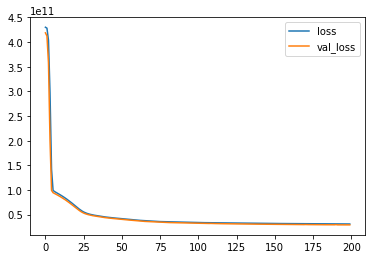

In [21]:
# Step 26
losses.plot()

In [23]:
from tensorflow.keras.models import load_model
model.save('second_model_kc_house.h5')

In [24]:
# Step 27
pred = model.predict(X_test)

In [25]:
# Step 28
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(model.evaluate(X_test, y_test, verbose=0), '  MAE: ', mean_absolute_error(pred, y_test))
print(model.evaluate(X_test, y_test, verbose=0), '  MSE: ', mean_squared_error(pred, y_test))
print(model.evaluate(X_test, y_test, verbose=0), '  RMSE: ', np.sqrt(mean_squared_error(pred, y_test)))

29228412928.0   MAE:  105301.9367296007
29228412928.0   MSE:  29228418691.730064
29228412928.0   RMSE:  170963.20859100085


# Making Prediction on a single house

In [27]:
# Step 29
single_house = df.drop('price', 1).iloc[0]

In [28]:
single_house = single_house.values.reshape(-1,19)

In [29]:
single_house = scaler.transform(single_house)

In [30]:
model.predict(single_house)

array([[284157.8]], dtype=float32)

In [31]:
df['price'][0]

221900.0

# Weight Initialization
kernel_initializer= 'glorot_uniform', 'he_uniform', 'glorot_normal', 'he_normal'
* These simply means weight are gotten either from the uniform or the normal distribution
* We dont want too small weights because of vanishing gradient problem and large because of Exploding Gradiet problem
* We dont want same weights just incase of 0
*  weight must have good varience so that each neuron could learn diff things

In [35]:
model =  Sequential()

model.add(Dense(19, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(19, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(19, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(19, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.fit(X_train, y_train,
          epochs=200, verbose=1,
          batch_size=128, validation_data=(X_test, y_test),
          callbacks=[stop])

Epoch 1/200
119/119 [==============================] - 1s 4ms/step - loss: 430231879680.0000 - val_loss: 418880225280.0000
Epoch 2/200
119/119 [==============================] - 0s 2ms/step - loss: 428957696000.0000 - val_loss: 414537515008.0000
Epoch 3/200
119/119 [==============================] - 0s 2ms/step - loss: 410541981696.0000 - val_loss: 371508510720.0000
Epoch 4/200
119/119 [==============================] - 0s 2ms/step - loss: 319147180032.0000 - val_loss: 228267606016.0000
Epoch 5/200
119/119 [==============================] - 0s 2ms/step - loss: 160059604992.0000 - val_loss: 103657021440.0000
Epoch 6/200
119/119 [==============================] - 0s 2ms/step - loss: 100002676736.0000 - val_loss: 94359912448.0000
Epoch 7/200
119/119 [==============================] - 0s 2ms/step - loss: 96588447744.0000 - val_loss: 92640419840.0000
Epoch 8/200
119/119 [==============================] - 0s 2ms/step - loss: 94734786560.0000 - val_loss: 90923401216.0000
Epoch 9/200
119/119 [

In [37]:
model.evaluate(X_test, y_test, verbose=0)

29130401792.0

In [38]:
model =  Sequential()

model.add(Dense(19, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(19, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(19, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(19, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [39]:
model.fit(X_train, y_train,
          epochs=200, verbose=1,
          batch_size=128, validation_data=(X_test, y_test),
          callbacks=[stop])

In [40]:
model.evaluate(X_test, y_test, verbose=0)

29770866688.0

In [41]:
model =  Sequential()

model.add(Dense(19, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(19, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(19, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(19, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train,
          epochs=200, verbose=1,
          batch_size=128, validation_data=(X_test, y_test),
          callbacks=[stop])

Epoch 1/200
119/119 [==============================] - 0s 3ms/step - loss: 430212513792.0000 - val_loss: 418786410496.0000
Epoch 2/200
119/119 [==============================] - 0s 2ms/step - loss: 427916525568.0000 - val_loss: 411130658816.0000
Epoch 3/200
119/119 [==============================] - 0s 2ms/step - loss: 398928609280.0000 - val_loss: 347322974208.0000
Epoch 4/200
119/119 [==============================] - 0s 2ms/step - loss: 277036793856.0000 - val_loss: 175264284672.0000
Epoch 5/200
119/119 [==============================] - 0s 2ms/step - loss: 125992665088.0000 - val_loss: 96196124672.0000
Epoch 6/200
119/119 [==============================] - 0s 2ms/step - loss: 97893916672.0000 - val_loss: 93741252608.0000
Epoch 7/200
119/119 [==============================] - 0s 2ms/step - loss: 95803990016.0000 - val_loss: 91813986304.0000
Epoch 8/200
119/119 [==============================] - 0s 2ms/step - loss: 93821067264.0000 - val_loss: 89969549312.0000
Epoch 9/200
119/119 [==

In [42]:
model.evaluate(X_test, y_test, verbose=0)

28947460096.0

# he_normal worked best